In [1]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

In [2]:
cfg = get_cfg()

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [73]:
img = cv2.imread("/home/jun/myWorks/GOD/others/sample2.jpg")

In [6]:
cfg = get_cfg()
cfg.merge_from_file("/home/jun/myWorks/GOD/others/config.yaml")
cfg.MODEL.WEIGHTS = "/home/jun/myWorks/GOD/others/model_final.pth"  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

Config '/home/jun/myWorks/GOD/others/config.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [75]:
output = predictor(img)

In [59]:
n = len(output['instances'])
output['instances'][3].get_fields()['pred_classes'].item()

4

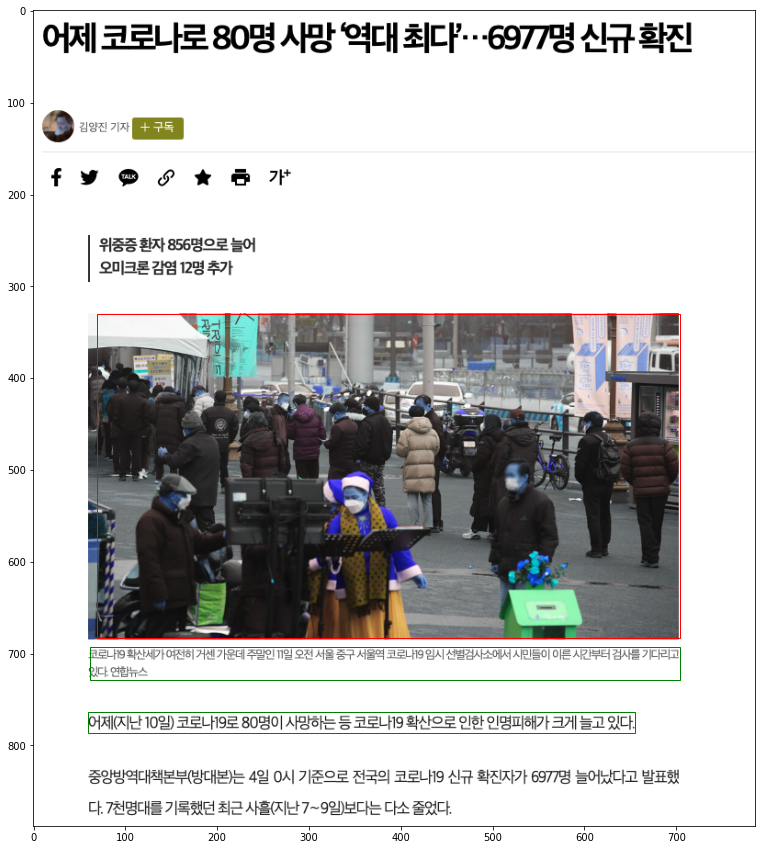

In [76]:
plt.figure(figsize=(15,15))
currentAxis = plt.gca()
for box in range(len(output['instances'])):
    if output['instances'][box].get_fields()['pred_classes'].item() != 4: # 이미지가 아니면 초록
        x1, y1, x2, y2 = output['instances'][box].get_fields()['pred_boxes'].tensor[0].to('cpu')
        currentAxis.add_patch(Rectangle((x1, y1), x2-x1, y2-y1, color="green", fill=None))
    else: # 이미지면 빨강
        x1, y1, x2, y2 = output['instances'][box].get_fields()['pred_boxes'].tensor[0].to('cpu')
        currentAxis.add_patch(Rectangle((x1, y1), x2-x1, y2-y1, color="red", fill=None))
plt.imshow(img)
plt.show()